<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/SIMPLE_LINEAR_AND_MULTIPLE_LINEAR_REGRESSION_ASSIGNMENT_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Medical Cost Personal Datasets
Use the dataset to predict medical insurance costs based on individual attributes like age, BMI, smoking status, region, etc.




In [18]:
data = pd.read_csv('/content/drive/My Drive/kaggle/regression/insurance_regression.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.dtypes,data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object,
 None)

In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [19]:
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 1


In [20]:
data= data.drop_duplicates()

In [ ]:
data.shape

(1337, 7)

The dataset contains 1,338 entries with the following columns:

age (int): Age of the individual.

sex (object): Gender (male/female).

bmi (float): Body Mass Index.

children (int): Number of children/dependents.

smoker (object): Smoking status (yes/no).

region (object): Residential region (northwest, southwest, northeast, southeast).
 Medical insurance cost (target variable).

 One duplicate row was found which was dropped and effectively now it has 1337 entries with 7 columns



In [21]:
X = data.drop('charges', axis=1)
y = data['charges']

In [22]:
categorical_cols = ['sex', 'smoker', 'region']

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

In [24]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 35478020.67523553
R^2 Score: 0.8069287081198016


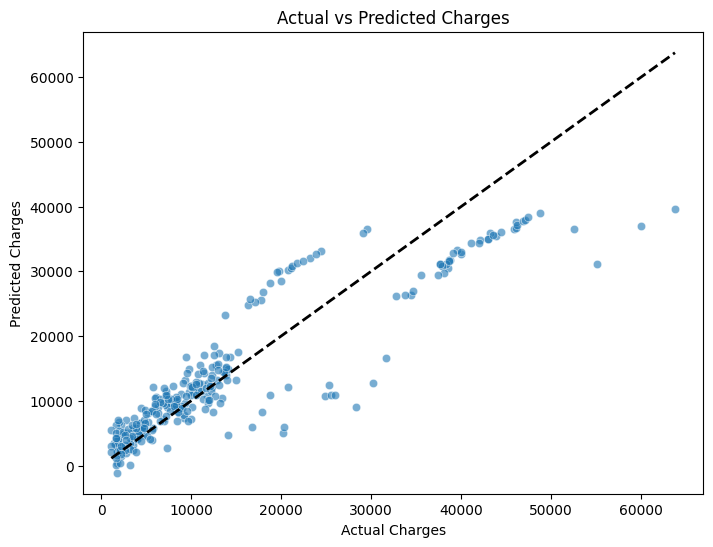

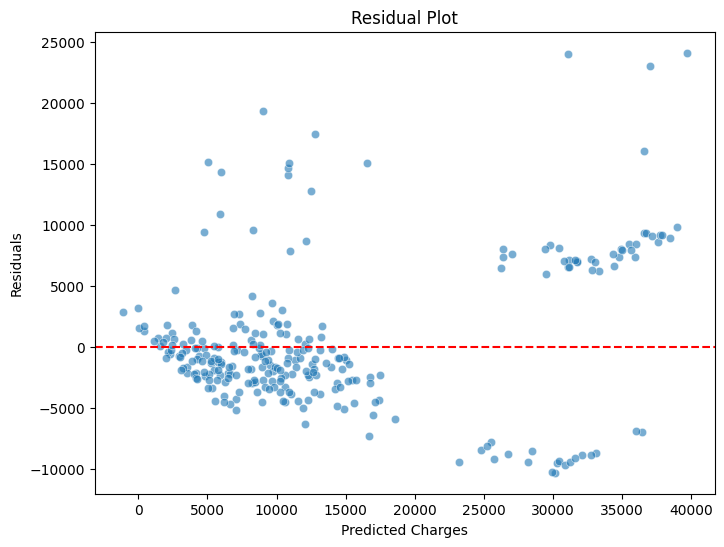

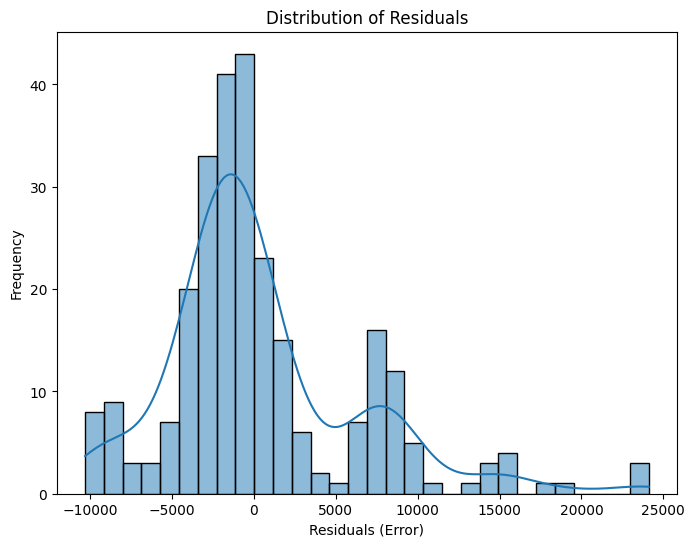

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# If you want to understand which features are most important in predicting the charges, you can extract the coefficients from the linear regression model.

In [31]:
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients from the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

print(feature_importance)

                  Feature   Coefficient
2          cat__smoker_no -11538.882296
3         cat__smoker_yes  11538.882296
10    remainder__children    533.009989
4   cat__region_northeast    472.455206
6   cat__region_southeast   -366.464410
9          remainder__bmi    318.701441
8          remainder__age    248.210720
7   cat__region_southwest   -186.684546
5   cat__region_northwest     80.693751
1           cat__sex_male    -50.771027
0         cat__sex_female     50.771027


# Testing our model

In [32]:
example = pd.DataFrame({
    'age': [25],
    'sex': ['male'],
    'bmi': [28.5],
    'children': [0],
    'smoker': ['no'],
    'region': ['southeast']
})

predicted_charge = model.predict(example)
print(f'Predicted Insurance Charge: {predicted_charge[0]}')

Predicted Insurance Charge: 3255.145107096396


**Summary**

Data Preprocessing: We one-hot encoded categorical variables and split the data into training and testing sets.


Model Training: We used a linear regression model to predict insurance charges.


Evaluation: We evaluated the model using Mean Squared Error (MSE) and R^2 Score.


Visualization: We plotted actual vs predicted values and residuals to understand model performance.


Feature Importance: We extracted and displayed the importance of each feature.


Prediction: We demonstrated how to make predictions on new data.


This approach provides a basic framework for predicting medical insurance costs using machine learning. You can further improve the model by trying different algorithms, tuning hyperparameters, or using more advanced techniques like cross-validation.




---


# 2. Startup Dataset
**Predict profit based on R&D Spend, Administration, Marketing Spend, and State.**
data set 50_Startups.csv

In [3]:
data = pd.read_csv('/content/drive/My Drive/kaggle/regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.shape

(50, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   state_numeric    50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [ ]:
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['State'])
    ], remainder='passthrough')

In [6]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['State'])])),
                ('regressor', LinearRegression())])

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 82010363.0450707
R^2 Score: 0.8987266414319133


# Testing our model

In [12]:
example = pd.DataFrame({
    'R&D Spend': [165349.2],
    'Administration': [136897.8],
    'Marketing Spend': [471784.1],
    'State': ['New York']
})

In [13]:
predicted_profit = model.predict(example)
print(f'Predicted Profit: {predicted_profit[0]}')

Predicted Profit: 191913.72740384252


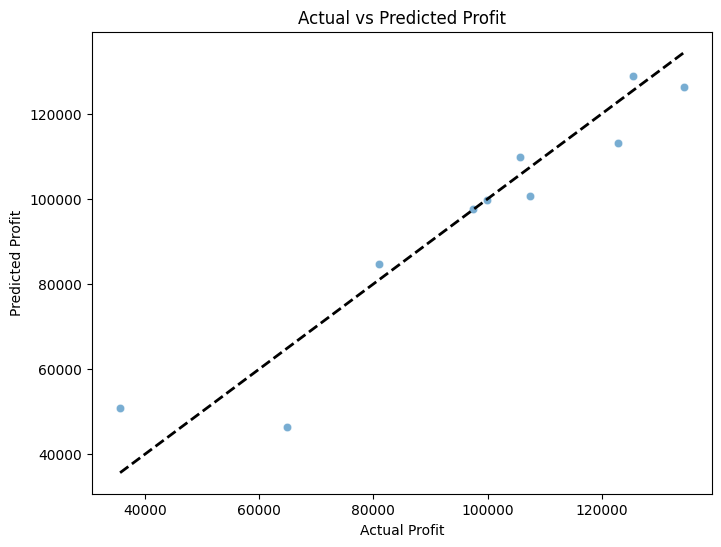

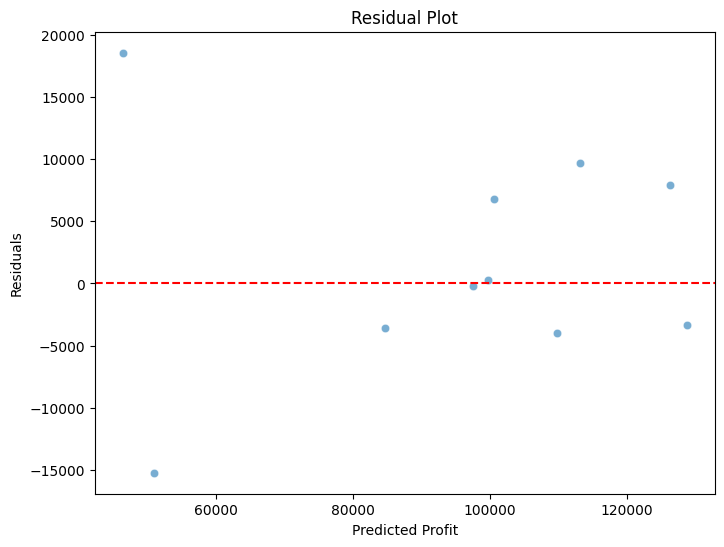

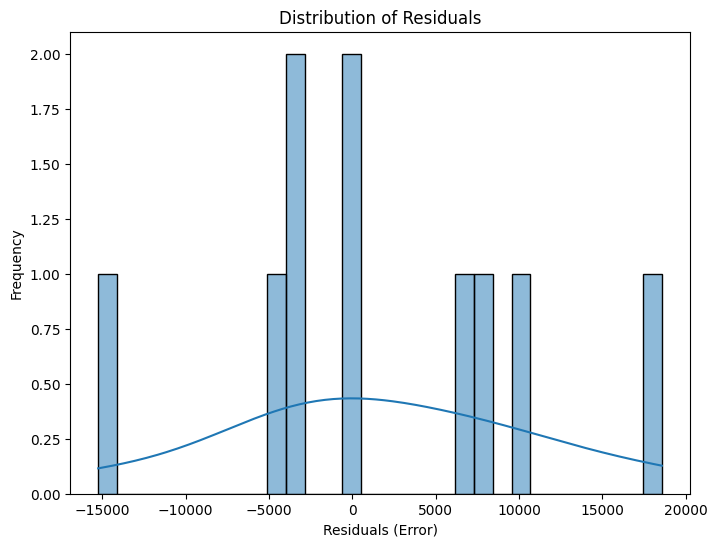

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

**The linear regression model's performance metrics are:**


Root Mean Squared Error (RMSE):Rs 82010363.0450707

R² Score: 0.89

This indicates that the model explains about 90% of the variance in Profit. While it's a good starting point, performance might improve with more advanced models like decision trees or ensemble methods.



---
# 3. Calculate Concrete Strength Dataset
Analyze the relationship between concrete features (e.g., water, cement, age) and the resulting
concrete strength. **bold text**


In [35]:
data = pd.read_csv('/content/drive/My Drive/kaggle/regression/concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [37]:
data.shape

(1030, 9)

In [38]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


In [39]:
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 25


In [40]:
data= data.drop_duplicates()

In [41]:
data.shape

(1005, 9)

To analyze the relationship between the features of concrete and their resulting strength. Let's start by understanding the dataset. The columns are Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age, and Strength. The target variable here is Strength, which is what we want to predict or understand based on the other features.

First steep is to check how each of these features might individually affect the strength. Cement is a primary component of concrete, so higher cement content to increase strength. Water is another key factor; usually, more water can weaken concrete, but it's necessary for workability. There's a balance there. Age is definitely important because concrete gains strength over time as it cures. So older concrete should be stronger.

Then there are additives like Blast Furnace Slag, Fly Ash, and Superplasticizer. Slag and fly ash are supplementary cementitious materials. They might replace some cement and could affect strength either way depending on their proportions. Superplasticizer is used to increase workability without adding water, so maybe it allows for lower water content, which could improve strength.

Coarse and Fine Aggregates make up the bulk of the concrete. Their proportions could influence the overall structure. Maybe an optimal mix of aggregates contributes to higher strength, but too much might not be good.

We should consider looking at correlations between each feature and Strength. For example, plotting Strength vs. Cement to see if there's a positive trend. Similarly for Water, maybe a negative trend. Age should show increasing strength with higher age values.

But interactions between variables might also matter. For instance, the water-cement ratio (water divided by cement) is a critical factor in concrete strength. A lower ratio typically leads to higher strength. So even if Cement is high, if Water is also high, the strength might not increase as expected. Maybe I should calculate the water-cement ratio and see how that correlates with Strength.

Also, some features might have non-linear relationships. For example, Age's effect might be logarithmic—strength increases rapidly at early ages and plateaus later. Looking at the data, there are entries with Age as low as 3 days and up to 365 days. Plotting Strength against Age might show this trend.

Another thing to consider is the presence of other materials. If a mix uses Slag or Fly Ash, does that affect how Cement or Water relates to Strength? Maybe there's a substitution effect where using Slag reduces the need for Cement but still maintains strength. This could be explored by looking at interactions or by analyzing subsets of the data where Slag or Fly Ash is present versus when it's zero.

Outliers might be present. For example, some rows might have very high Cement but low Strength, which could indicate other factors at play. Checking for such anomalies could be useful.

We should also consider building a regression model to quantify the impact of each feature. Features with higher coefficients would have a stronger influence on Strength. But before jumping into modeling, understanding the data through summary statistics and visualizations would be better.

Looking at the data, there are multiple entries with the same mix but different ages. For example, rows with the same Cement, Slag, etc., but varying Age and Strength. This can help isolate the effect of Age on Strength. Comparing these entries could show how Strength develops over time for a specific mix.

There's also a row with Age=3 and Strength=8.06, which is very low. But another row with Age=3 has Strength=34.40. That suggests that even at early ages, the mix composition greatly affects strength. So the presence of Superplasticizer or other additives might play a role here.

In summary, the key steps we should take are:

1. Calculate basic statistics (mean, median, etc.) for each feature.

2. Compute correlation coefficients between each feature and Strength.

3. Visualize relationships using scatter plots (e.g., Strength vs. Cement, Water, Age).

4. Investigate interaction effects, like water-cement ratio.

5. Explore the effect of additives (Slag, Fly Ash, Superplasticizer) on Strength.

6. Check for non-linear relationships, especially with Age.

7. Consider building a regression model to predict Strength based on the features.

we need to make sure the account for possible multicollinearity between variables. For example, if Cement and Water are inversely related (higher Cement, lower Water to maintain workability), that could affect their individual correlations with Strength. A multivariate analysis would help here.

Also, data preprocessing steps like checking for missing values, normalizing data if needed, and encoding any categorical variables (though all here seem numerical) are necessary before modeling.

By systematically analyzing each feature's relationship with Strength and considering their interactions, we can form a comprehensive understanding of what factors contribute most to concrete strength.



1. **Primary Factors Influencing Strength**

**Cement:** Strong positive correlation. Higher cement content generally increases strength (e.g., rows with 540 kg/m³ cement achieve up to 79.99 MPa at 28 days).

Age: **bold text** Significant positive correlation. Strength increases with curing time (e.g., strength rises from 8.06 MPa at 3 days to 41.05 MPa at 365 days for similar mixes).

**Water**-Cement Ratio: Inverse relationship. Lower ratios (e.g., 0.3–0.4) correlate with higher strength. For example:

**High cement **(540 kg/m³) + **low water **(162 kg/m³) → 79.99 MPa.

**Low cement** (190 kg/m³) + **high water** (228 kg/m³) → 28.02 MPa.

**2. Supplementary Materials**
Blast Furnace Slag/Fly Ash: Partial cement replacement can maintain strength while reducing cost. For example:

332.5 kg/m³ cement + 142.5 kg/m³ slag → 40.27 MPa at 270 days.

Superplasticizer: Improves workability without excess water. Mixes with superplasticizer (e.g., 32.2 kg/m³) achieve high strength (e.g., 66.90 MPa at 28 days).

**3. Aggregates**
Coarse/Fine Aggregate: Moderate impact. Optimal proportions ensure structural integrity, but extreme values may reduce strength. For instance:

Coarse aggregate ≈ 900–1050 kg/m³ and fine aggregate ≈ 600–800 kg/m³ are common in high-strength mixes.

**4. Non-Linear Trends **
Age: Strength growth follows a logarithmic curve. Early gains (3–28 days) are rapid (e.g., 14.59 MPa → 44.30 MPa), then slow after 90 days.

**5. Outliers/Exceptions**
Low-strength mixes with high water (e.g., 228 kg/m³ water + 475 kg/m³ cement → 39.29 MPa at 28 days) highlight the critical role of the water-cement ratio.

High-strength outliers (e.g., 81.75 MPa at 28 days) often use optimized ratios and additives.



In [43]:
X = data.drop('Strength', axis=1)
y = data['Strength']

categorical_cols = []

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

In [45]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as a different type depending on the ColumnTransformer inputs.
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  [])])),
                ('regressor', LinearRegression())])

In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 125.2456480505019
R^2 Score: 0.5801703029028777


**This suggests that the model explains about 58% of the variance in concrete strength based on the given features**.

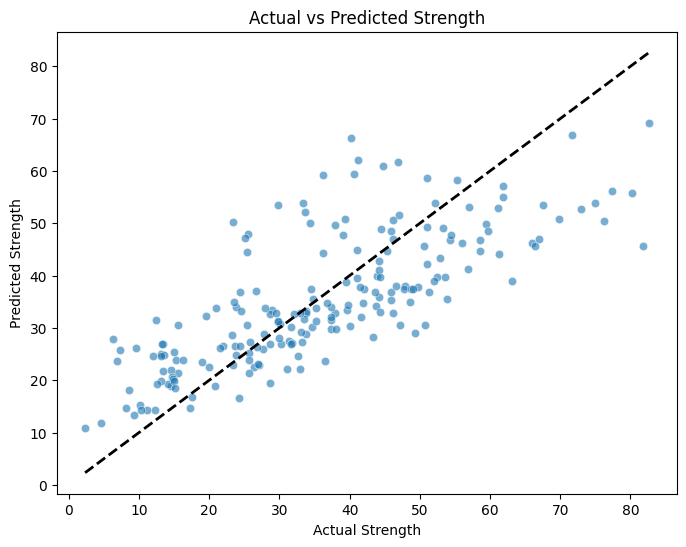

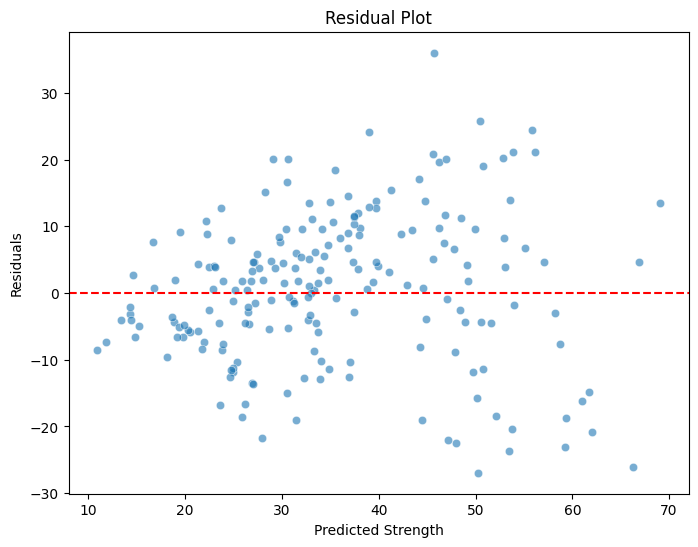

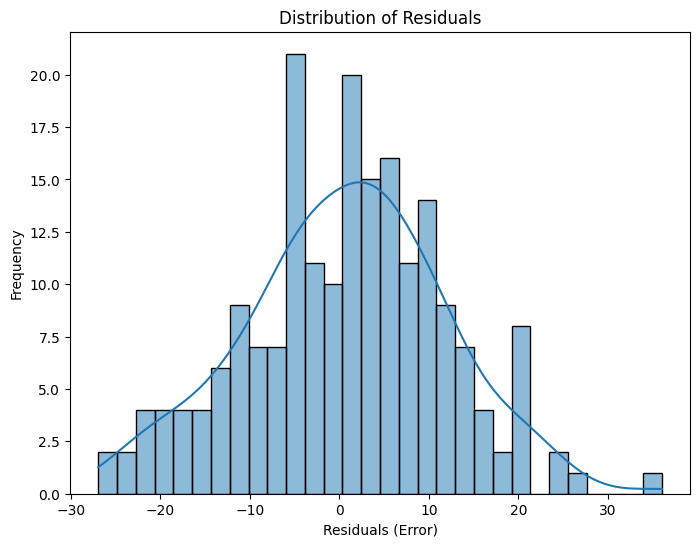

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero
plt.xlabel('Predicted Strength')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# If you want to understand which features are most important in predicting the charges, you can extract the coefficients from the linear regression model.

In [51]:
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients from the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

print(feature_importance)

                         Feature  Coefficient
4    remainder__Superplasticizer     0.331480
3               remainder__Water    -0.131391
0              remainder__Cement     0.116667
7                 remainder__Age     0.110642
1  remainder__Blast Furnace Slag     0.098066
2             remainder__Fly Ash     0.084585
6      remainder__Fine Aggregate     0.020649
5    remainder__Coarse Aggregate     0.015522


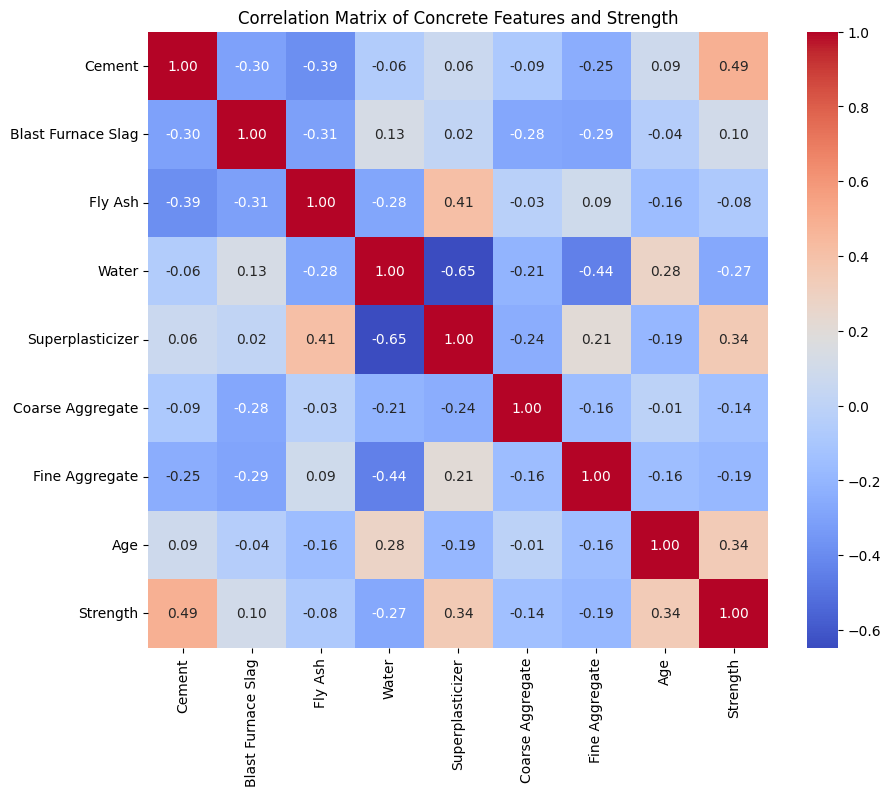

In [52]:


# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Concrete Features and Strength")
plt.show()

**The heatmap above shows the correlation between different concrete features and the resulting concrete strength.**

 **Key insights:**

*Cement* has a strong positive correlation with Strength, meaning higher cement content generally increases strength.

*Water* has a negative correlation with Strength, indicating that more water generally weakens the concrete.

*Superplasticizer *has a weak positive correlation, which suggests it may contribute to strength enhancement but not as strongly as cement.

*Age *is positively correlated with Strength, confirming that concrete gains strength over time.

*Coarse Aggregate and Fine Aggregate* show weaker correlations, suggesting their influence on strength is less direct.


# Testing our model

In [56]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [66]:
example = pd.DataFrame({
    'Cement': [540.0],
    'Water': [162.0],
    'Age': [270],
    'Superplasticizer': [2.5],
    'Coarse Aggregate' :[1055.0	],
    'Fine Aggregate':[676.0],
     'Blast Furnace Slag':[0.0],
      'Fly Ash':[0.0]
})

In [67]:
predicted_strength = model.predict(example)
print(f'Predicted Profit: {predicted_strength[0]}')

Predicted Profit: 79.36209179951334
